In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oil = yf.Ticker("CL=F")

In [4]:
# get historical market data
hist = oil.history(period="20y")

In [7]:
# plot
pd.set_option('display.float_format', '{:,.1f}'.format)
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"5,028.0","5,028.0","5,028.0","5,028.0","5,028.0","5,028.0","5,028.0"
mean,70.1,71.2,68.9,70.1,"341,405.5",0.0,0.0
std,22.4,22.6,22.2,22.5,"207,863.1",0.0,0.0
min,-14.0,13.7,-40.3,-37.6,0.0,0.0,0.0
25%,52.1,52.9,51.0,52.1,"202,160.8",0.0,0.0
50%,68.2,69.3,67.0,68.1,"298,966.5",0.0,0.0
75%,88.0,89.2,86.6,88.0,"436,219.0",0.0,0.0
max,145.2,147.3,143.2,145.3,"2,288,230.0",0.0,0.0


In [11]:
pd.set_option('display.float_format', '{:,.1f}'.format)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-18 00:00:00-05:00,33.4,33.9,32.9,33.7,54039,0.0,0.0
2003-12-19 00:00:00-05:00,33.7,33.9,32.8,33.0,82647,0.0,0.0
2003-12-22 00:00:00-05:00,32.9,33.0,31.8,31.9,82031,0.0,0.0
2003-12-23 00:00:00-05:00,31.9,32.0,31.2,32.0,59363,0.0,0.0
2003-12-24 00:00:00-05:00,32.1,33.0,31.9,32.9,60080,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-12 00:00:00-05:00,71.4,72.0,68.2,68.6,324530,0.0,0.0
2023-12-13 00:00:00-05:00,68.7,69.9,67.7,69.5,306996,0.0,0.0
2023-12-14 00:00:00-05:00,69.8,72.5,69.5,71.6,275688,0.0,0.0


<Axes: xlabel='Date'>

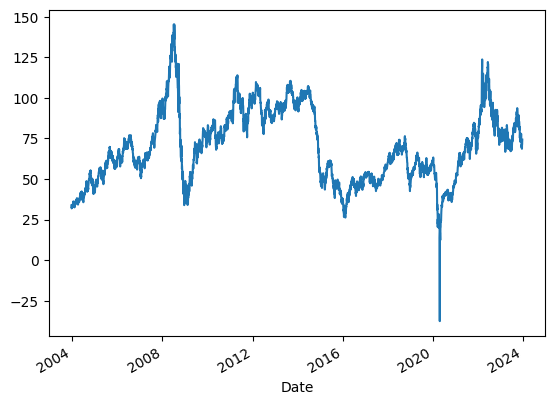

In [14]:
hist['Close'].plot()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Step 2: Prepare the data
x = hist.index.values
y = hist['Close'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(x, y, color='black', label='Actual values')
plt.plot(x, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=['2003-12-18T05:00:00.000000000' '2003-12-19T05:00:00.000000000'
 '2003-12-22T05:00:00.000000000' ... '2023-12-14T05:00:00.000000000'
 '2023-12-15T05:00:00.000000000' '2023-12-18T05:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
# Calculate mean and standard deviation
mean_value = hist['Close'].mean()
std_dev = hist['Close'].std()

# Identify values 3 standard deviations away from the mean
threshold = 3 * std_dev
outliers = hist[(hist['Close'] > mean_value + threshold) | (hist['Close'] < mean_value - threshold)]

# Print the DataFrame with outliers
outliers

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-06-06 00:00:00-04:00,128.2,139.1,127.8,138.5,508749,0.0,0.0
2008-06-26 00:00:00-04:00,134.5,140.4,133.7,139.6,295773,0.0,0.0
2008-06-27 00:00:00-04:00,139.4,143.0,138.6,140.2,277517,0.0,0.0
2008-06-30 00:00:00-04:00,140.6,143.7,139.2,140.0,253428,0.0,0.0
2008-07-01 00:00:00-04:00,140.2,143.3,139.9,141.0,238751,0.0,0.0
2008-07-02 00:00:00-04:00,141.4,144.3,140.0,143.6,253397,0.0,0.0
2008-07-03 00:00:00-04:00,144.2,145.9,143.2,145.3,193841,0.0,0.0
2008-07-07 00:00:00-04:00,144.3,144.5,139.5,141.4,304148,0.0,0.0
2008-07-10 00:00:00-04:00,135.8,142.1,135.4,141.6,294339,0.0,0.0
